In [185]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime 
#import spotipy
#import spotipy.util as util

In [186]:
scope = 'playlist-read-private playlist-read-collaborative user-library-read user-read-recently-played user-top-read'
redirect_uri = "http://localhost/"
username = ""
client_id = ""
client_secret = ""

In [187]:
#data = pd.read_csv('topChartWithFeatures.csv')
data = pd.read_csv('streams_continuous.csv')

#dataset
data.head()


,Unnamed: 0,Unnamed: 0.1,Artist,Song,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,0,0,Post Malone,rockstar,1,1502394,2018-01-01,0e7ipj03S05BNilyu5bRzt,218147,4,159.801,5,0,0.129,0.585,0.520,0.12400,0.000070
1,1,1,G-Eazy,No Limit,2,1027039,2018-01-01,2DQ1ITjI0YoLFzuADN1ZBW,245387,4,175.957,1,1,0.405,0.838,0.771,0.01170,0.000000
2,2,2,Lil Pump,Gucci Gang,3,930620,2018-01-01,43ZyHQITOjhciSUUNPVRHc,124056,4,119.889,5,1,0.699,0.936,0.523,0.23900,0.000000
3,3,3,Cardi B,Bartier Cardi (feat. 21 Savage),4,877478,2018-01-01,0dIoGTQXDh1wVnhIiSyYEa,224285,4,138.015,1,1,0.109,0.908,0.524,0.00111,0.000678
4,4,4,Camila Cabello,Havana,5,860232,2018-01-01,1rfofaqEpACxVEHIZBJe6W,217307,4,104.988,2,1,0.394,0.765,0.523,0.18400,0.000036


In [188]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Rank,Streams,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
count,151601.000000,151601.000000,151601.000000,1.516010e+05,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000
mean,75800.000000,75800.000000,100.499344,4.156785e+05,199190.991511,3.958364,121.968125,5.376614,0.593894,0.448434,0.707267,0.599525,0.224544,0.006963
std,43763.583417,43763.583417,57.734871,2.984839e+05,46582.185873,0.392216,31.187651,3.682299,0.491106,0.203869,0.149032,0.159106,0.237183,0.049412
min,0.000000,0.000000,1.000000,1.578150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37900.000000,37900.000000,50.000000,2.474270e+05,173800.000000,4.000000,97.062000,1.000000,0.000000,0.294000,0.620000,0.511000,0.040900,0.000000
50%,75800.000000,75800.000000,100.000000,3.128680e+05,197947.000000,4.000000,123.146000,6.000000,1.000000,0.437000,0.729000,0.603000,0.137000,0.000000
75%,113700.000000,113700.000000,150.000000,4.643890e+05,221543.000000,4.000000,144.111000,9.000000,1.000000,0.584000,0.809000,0.715000,0.331000,0.000007
max,151600.000000,151600.000000,200.000000,5.749019e+06,943529.000000,5.000000,232.690000,11.000000,1.000000,0.980000,0.980000,0.978000,0.994000,0.956000


In [189]:
data.shape

(151601, 18)

In [190]:
types = data.dtypes
#print(types)

In [191]:
#change column types



#strm = data["Streams"]

#for i in range(len(strm)):
#    if type(strm[i]) == str:
#        strm[i] = int(strm[i].replace(",",""))
 


In [192]:
data["Date"] = pd.to_datetime(data["Date"])
features = data[['Danceability', 'Energy', 'Duration', 'Acousticness', 'Key','Mode','Instrumentalness','Tempo', 'Time Signature']]

In [193]:
betternowdata = data.loc[data['Song']=='Better Now']
psychodata = data.loc[data['Song']=='Psycho (feat. Ty Dolla $ign)']



likeitdata = data.loc[data['Song']=='I Like It']
#target2 = data.loc[data['Rank']=1]
#print(likeitdata)
americadata=data.loc[data['Song']=='This Is America']
print(americadata)

       Unnamed: 0  Unnamed: 0.1            Artist             Song  Rank  \
25015       25015         25015  Childish Gambino  This Is America    16   
25200       25200         25200  Childish Gambino  This Is America     1   
25400       25400         25400  Childish Gambino  This Is America     1   
25600       25600         25600  Childish Gambino  This Is America     1   
25800       25800         25800  Childish Gambino  This Is America     1   
26000       26000         26000  Childish Gambino  This Is America     1   
26200       26200         26200  Childish Gambino  This Is America     1   
26400       26400         26400  Childish Gambino  This Is America     1   
26600       26600         26600  Childish Gambino  This Is America     1   
26800       26800         26800  Childish Gambino  This Is America     1   
27000       27000         27000  Childish Gambino  This Is America     1   
27200       27200         27200  Childish Gambino  This Is America     1   
27400       

In [194]:
#separate rank x, y
# date in yyyy/mm/dd format 
#old data 10/31/18


#train with one song, test on other song
date1=datetime.datetime(2018, 10, 31) 
likeitold = likeitdata.loc[likeitdata['Date']<=date1] 
#print(likeitold)
likeitnew = likeitdata.loc[likeitdata['Date']>date1]
#print(likeitnew)

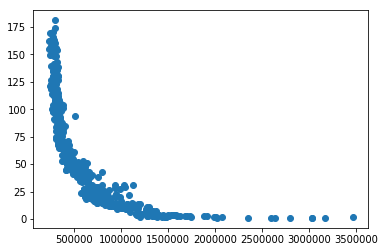

In [195]:
# Goal: Pick one song, predict rank next day(predict 10/27/19 using data from 4/6/18 to 10/26/19) )
#separate rank to x: before 10/27and y 
#2 similar songs 1 as train and 1 as test
#Features: date, last days rank(the day before rank), number of streams, song features 

#2 songs with similar dates
X=betternowdata[['Streams']].values
y=betternowdata[['Rank']].values
#Y=likeitnew[['Rank']]

plt.scatter(X, y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf51780>]],
      dtype=object)

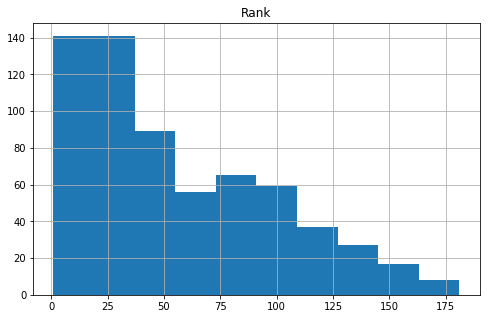

In [196]:

betternowdata.hist('Rank',figsize=(8,5))

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2015fd30>]],
      dtype=object)

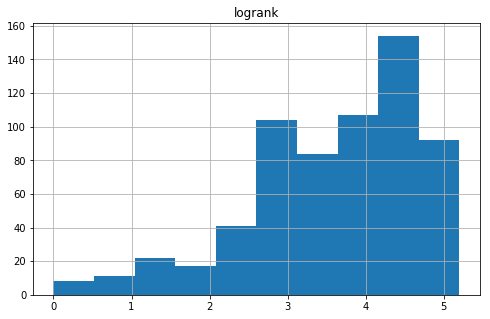

In [197]:
##log transformation attempt 2
logy = np.log(y)
betternowdata['logrank'] = np.log(betternowdata['Rank'])

betternowdata.hist('logrank',figsize=(8,5))





In [200]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols(formula=f, data=betternowdata).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'rank', fig=fig)

PatsyError: Error evaluating factor: NameError: name 'rankf' is not defined
    rankf
    ^^^^^

In [198]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#f = 'rankf'

model = ols(formula=f, data=betternowdata).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'rank', fig=fig)




PatsyError: Error evaluating factor: NameError: name 'rankf' is not defined
    rankf
    ^^^^^

In [ ]:
## curve fit, log transformation attempt 1
import scipy as sp
import scipy.optimize
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a*np.exp(b*x)


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Set the y-axis scaling to logarithmic
ax.set_yscale('log')

# Set the y-ticks
#ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
#ax.set_ylim(0.1, 1000)

#ax.scatter(X,y)
#plt.yscale('log')


In [ ]:
X =np.array(X)
y =np.array(y)
pars, cov = curve_fit(f=exponential, xdata=X,ydata= y)
#pars, cov = curve_fit(f=exponential, xdata=X, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

#stdevs = np.sqrt(np.diag(cov))





In [ ]:
import scipy as sp
import scipy.optimize
from scipy.optimize import curve_fit

#replace x with t
def model_func(X, A, K, C):
    return A * np.exp(K * X) + C

def fit_exp_nonlinear(X, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, X, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C
    #print(A)
    #opt_parms, parm_cov.summary()

In [ ]:
A0, K0, C0 = orig_parms
A, K, C = fit_parms

ax.plot(t, y, 'k--', label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

In [ ]:
print(type(X))
#data=likeitdata.reshape((999,1))

In [ ]:
#linear regression 


#Next, we split 80% of the data to the training set 
#while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

In [ ]:

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
#better now, psycho post malone 
#y predict min =0, polynomial, building model with one song, 
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
#actual rank vs predicted rank bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#better now curve fit
import scipy as sp
import scipy.optimize


def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)


In [ ]:
#save the conituous stream to csv file
#data.to_csv("streams_continuous.csv")

In [ ]:
#use the model to predict psycho

X=psychodata [['Streams']].values
y=psychodata [['Rank']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
#linear model not accurate because no negative rank. Use log transformaiton? poisson
#once number of streams reach certain threshold, rank stays around 1(plateau)

#test train based on time
date1=datetime.datetime(2018, 10, 31) 
#psychoold


X=psychodata [['Streams']].values
y=psychodata [['Rank']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
# change in rank as y, polynomial (rank increasing or decreasing faster)

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


In [ ]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()